In [129]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import os
import seaborn

#  Описание задачи

Инсульт – это нарушение кровообращения в головном мозге, вызванное закупоркой или разрывом сосудов. Это состояние, когда сгусток крови – тромб – или кровь из разорвавшегося сосуда нарушает кровоток в мозге. Недостаток кислорода и глюкозы приводит к смерти клеток мозга и нарушению двигательных функций, речи или памяти. По некоторым признакам можно спрогнозировать появление инсульта у пациента. Необходимо построить модель на основании датасета, которая будет осуществлять этот прогноз.

##  Загрузка датасета

In [130]:
DATASET_PATH = os.path.abspath(os.path.join(os.getcwd(), '..', 'healthcare-dataset-stroke-data.csv'))

In [131]:
data = pd.read_csv(DATASET_PATH)
data.columns = dataset.columns.str.strip()

## Описание признаков

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not


## Размер и содержание датасета

In [132]:
data.shape

(5110, 12)

In [133]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Подготовка датасета


### Пропущенные значения

Столбец smoking_status содержит в себе значения "Unknown", заменим их на None.

In [134]:
data['smoking_status'].replace({'Unknown': None}, inplace=True)

Пропущенные значения bmi заменим на медианные величины, а в smoking_status будем заполнять сохраняя распределение среди известных записей

In [135]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)
probabilities = data['smoking_status'].value_counts(normalize=True)
missing = data['smoking_status'].isnull()
data.loc[missing, 'smoking_status'] = np.random.choice(probabilities.index, size=len(data[missing]), p=probabilities.values)

### Обработка признаков

Столбец id состоит из уникальных данных, которые в задаче для прогнозирования инсульта не нужны, поэтому уберём его.

In [136]:
data.drop('id', axis=1, inplace=True)
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Признаки gender, ever_married, Residence_type - бинарные. Заменим их значения на 0 и 1.

gender: 0 вместо Female, 1 вместо Male

ever_married: 0 вместо No, 1 вместо Yes

Residence_type: 0 вместо Rubal, 1 вместо Urban

In [137]:
data['gender'] = np.where(data['gender'] == 'Male', 1, 0)
data['ever_married'] = np.where(data['ever_married'] == 'Yes', 1, 0)
data['Residence_type'] = np.where(data['Residence_type'] == 'Urban', 1, 0)

Категориальные признаки преобразуем в бинарные

In [138]:
data = pd.get_dummies(data)

In [139]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.1,0,0,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,1,0,0


## Визуализация

Выведем основные метрики

In [140]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,0.508023,106.147677,28.862035,0.048728,0.128571,0.004305,0.572407,0.160274,0.134442,0.241487,0.536595,0.221918
std,0.492578,22.612647,0.296607,0.226063,0.475034,0.499985,45.283560,7.699562,0.215320,0.334758,0.065480,0.494778,0.366896,0.341160,0.428027,0.498708,0.415577
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.885000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Выведем матрицу корреляции, чтобы выявить зависимость признаков между собой

In [141]:
correlation_matrix = data.corr()
correlation_matrix

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.027623,0.021275,0.085717,-0.029936,-0.005937,0.054580,-0.026310,0.009117,-0.016534,0.011496,-0.032639,-0.025971,0.089283,0.032729,-0.046133,0.021651
age,-0.027623,1.000000,0.276398,0.263796,0.679125,0.014180,0.238171,0.324296,0.245257,0.130013,-0.078653,0.116534,0.327989,-0.634215,0.115028,-0.085311,-0.016098
hypertension,0.021275,0.276398,1.000000,0.108306,0.164243,-0.007913,0.174474,0.158293,0.127904,0.017685,-0.021608,-0.005413,0.115442,-0.129506,0.021183,-0.008236,-0.011933
heart_disease,0.085717,0.263796,0.108306,1.000000,0.114644,0.003092,0.161857,0.036916,0.134914,0.001330,-0.015712,0.000027,0.086760,-0.091634,0.041164,-0.059203,0.028649
ever_married,-0.029936,0.679125,0.164243,0.114644,1.000000,0.006261,0.155068,0.334911,0.108340,0.134041,-0.090838,0.153830,0.192716,-0.544441,0.066705,-0.073701,0.019740
Residence_type,-0.005937,0.014180,-0.007913,0.003092,0.006261,1.000000,-0.004946,-0.000277,0.015458,0.013131,0.022859,-0.018173,0.010594,-0.002309,0.012895,-0.021980,0.013095
avg_glucose_level,0.054580,0.238171,0.174474,0.161857,0.155068,-0.004946,1.000000,0.166876,0.131945,0.013845,-0.014675,0.016588,0.062694,-0.102250,0.035648,-0.020212,-0.012460
bmi,-0.026310,0.324296,0.158293,0.036916,0.334911,-0.000277,0.166876,1.000000,0.036110,0.077856,-0.028327,0.203886,0.070160,-0.442102,0.022079,-0.024412,0.006555
stroke,0.009117,0.245257,0.127904,0.134914,0.108340,0.015458,0.131945,0.036110,1.000000,0.002677,-0.014882,0.011888,0.062168,-0.083869,0.037951,-0.028457,-0.004938
work_type_Govt_job,-0.016534,0.130013,0.017685,0.001330,0.134041,0.013131,0.013845,0.077856,0.002677,1.000000,-0.025258,-0.444420,-0.167810,-0.151383,-0.000898,0.005226,-0.005346


<AxesSubplot:>

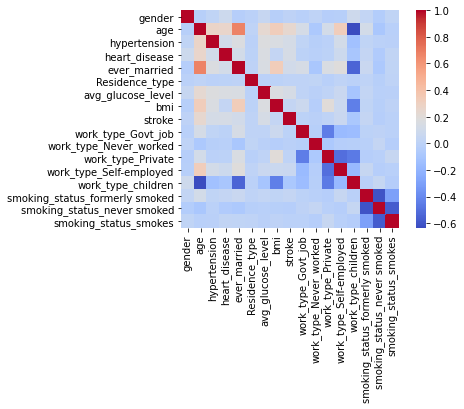

In [142]:
seaborn.heatmap(correlation_matrix, square=True, cmap="coolwarm")

Все корреляции закономерны и логичны

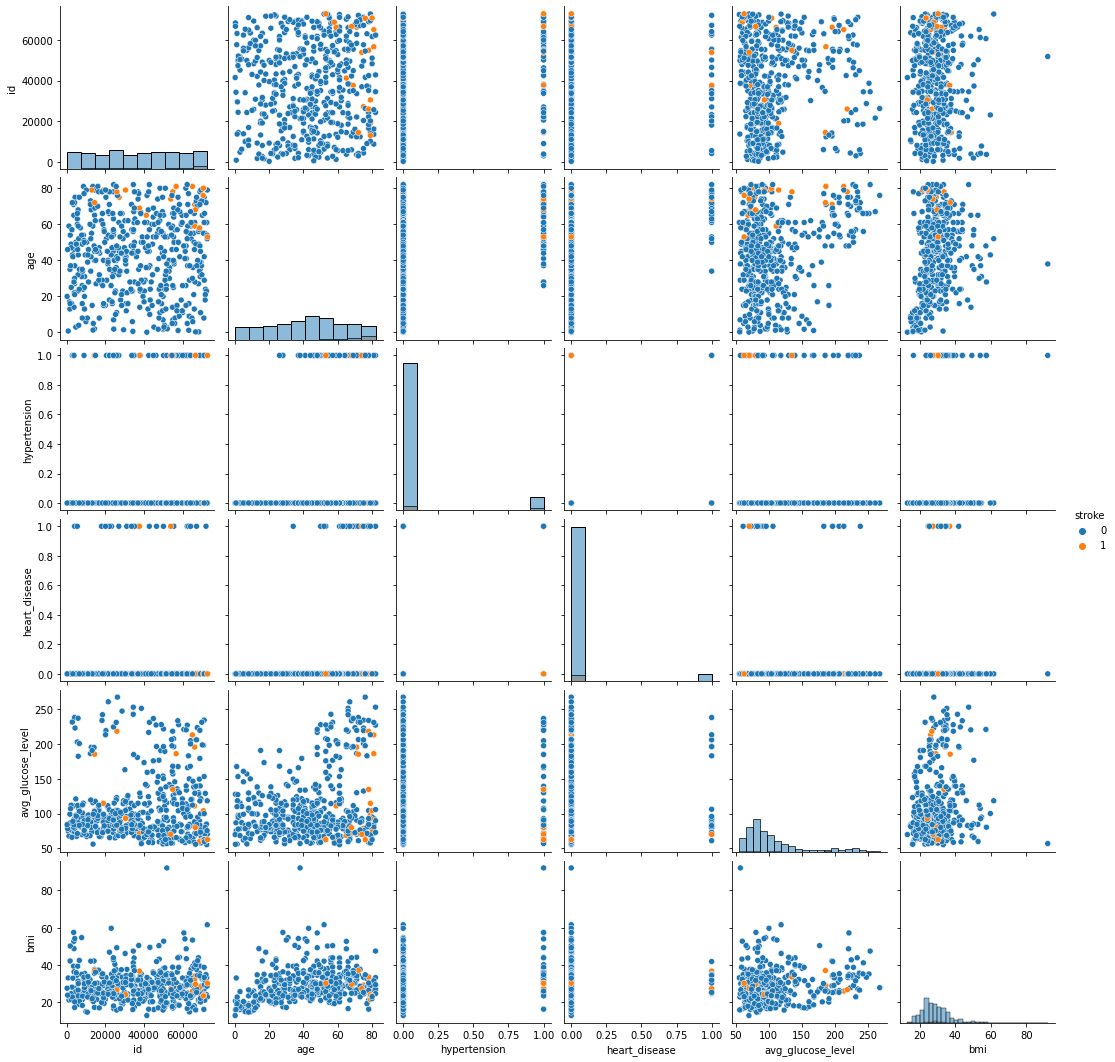

In [143]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
seaborn.pairplot(dataset.iloc[random_subset], hue='stroke', diag_kind='hist')

## Нормализация


Нормализацию выполним методом стандартизации

In [144]:
data_normalized = (data - data.mean(axis = 0)) / data.std(axis = 0)
data_normalized.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,2.423154e-16,-7.276211e-16,3.834984e-15,3.465047e-16,-2.588493e-16,-6.759325e-16,3.674925e-15,-9.830601e-15,-8.842731e-15,7.894533e-16,-2.471658e-16,2.277369e-16,2.775558e-16,-2.316912e-15,1.453936e-16,-7.659887e-16,4.962328e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.402611e-01,-1.908074e+00,-3.285697e-01,-2.389234e-01,-1.381301e+00,-1.016078e+00,-1.126848e+00,-2.410791e+00,-2.263051e-01,-3.840731e-01,-6.574993e-02,-1.156897e+00,-4.368378e-01,-3.940737e-01,-5.641872e-01,-1.075971e+00,-5.339995e-01
25%,-8.402611e-01,-8.060363e-01,-3.285697e-01,-2.389234e-01,-1.381301e+00,-1.016078e+00,-6.382598e-01,-6.574445e-01,-2.263051e-01,-3.840731e-01,-6.574993e-02,-1.156897e+00,-4.368378e-01,-3.940737e-01,-5.641872e-01,-1.075971e+00,-5.339995e-01
50%,-8.402611e-01,7.842450e-02,-3.285697e-01,-2.389234e-01,7.238134e-01,9.839834e-01,-3.149637e-01,-9.897124e-02,-2.263051e-01,-3.840731e-01,-6.574993e-02,8.642120e-01,-4.368378e-01,-3.940737e-01,-5.641872e-01,9.292116e-01,-5.339995e-01
75%,1.189873e+00,7.859932e-01,-3.285697e-01,-2.389234e-01,7.238134e-01,9.839834e-01,1.753909e-01,5.114531e-01,-2.263051e-01,-3.840731e-01,-6.574993e-02,8.642120e-01,-4.368378e-01,-3.940737e-01,-5.641872e-01,9.292116e-01,-5.339995e-01
max,1.189873e+00,1.714677e+00,3.042899e+00,4.184622e+00,7.238134e-01,9.839834e-01,3.656787e+00,8.927516e+00,4.417948e+00,2.603162e+00,1.520617e+01,8.642120e-01,2.288731e+00,2.537100e+00,1.772115e+00,9.292116e-01,1.872295e+00


## Разбиение данных

Разделим данные на обучающую и тестовую выборку с соотношением 3:1

In [145]:
import sklearn.model_selection
import sklearn.neighbors
import sklearn.svm
import sklearn.linear_model

In [146]:
x = data_normalized.drop(['stroke'], axis=1)
y = data['stroke']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=43)

## Классификатор ближайших соседей

Количество соседей = 4

In [147]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))

Train: 0.9493736951983298, Test: 0.9585289514866979


In [148]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))

Train: 0.9498956158663883, Test: 0.9577464788732394


Количество соседей = 10

In [149]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))

Train: 0.9491127348643006, Test: 0.9593114241001565


## Логистическая регрессия


In [150]:
model = sklearn.linear_model.LogisticRegression()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))

Train: 0.9483298538622129, Test: 0.9616588419405321


## Вывод

Видно, что с увеличение числа соседей в методе К ближайших соседей не гарантирует улучшение точности на тестовой выборке.

Также, алгоритм логистической регрессии незначительно превосходит метод ближайших соседей в точности.